In [6]:
import pandas as pd
import scipy as sc
import numpy as np
import os


import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import colorConverter
import seaborn as sns

%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic
%matplotlib inline

/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
from constants import guest_types
from constants import colors
from bootstrap import bootstrap
import plotting

In [8]:
from constants import systems

In [4]:
alphas = [i for i in systems if i[0] == "a"]
frame = pd.DataFrame()
list_ = []
for index, system in enumerate(alphas):
        df = pd.read_csv(f"../smirnoff-host-guest-simulations-data/systems/{system}/smirnoff/r014/flip.hist.dat", sep="\s+", header=0)
        list_.append(df)
frame = pd.concat(list_)

In [93]:
frame.columns = ["Angle", "1", "2", "3", "4", "5", "6"]

In [94]:
smirnoff = frame.groupby(level=0).mean()

In [95]:
alphas = [i for i in systems if i[0] == "a"]
frame = pd.DataFrame()
list_ = []
for index, system in enumerate(alphas):
        df = pd.read_csv(f"../smirnoff-host-guest-simulations-data/systems/{system}/bg2bg2-tip3p/flip.hist.dat", sep="\s+", header=0)
        list_.append(df)
frame = pd.concat(list_)

In [96]:
frame.columns = ["Angle", "1", "2", "3", "4", "5", "6"]

In [97]:
bg2bg2_tip3p = frame.groupby(level=0).mean()

In [98]:
alphas = [i for i in systems if i[0] == "a"]
frame = pd.DataFrame()
list_ = []
for index, system in enumerate(alphas):
        df = pd.read_csv(f"../smirnoff-host-guest-simulations-data/systems/{system}/bgbg-tip3p/flip.hist.dat", sep="\s+", header=0)
        list_.append(df)
frame = pd.concat(list_)

In [99]:
frame.columns = ["Angle", "1", "2", "3", "4", "5", "6"]

In [100]:
bgbg_tip3p = frame.groupby(level=0).mean()

Text(0,0.5,'Probability')

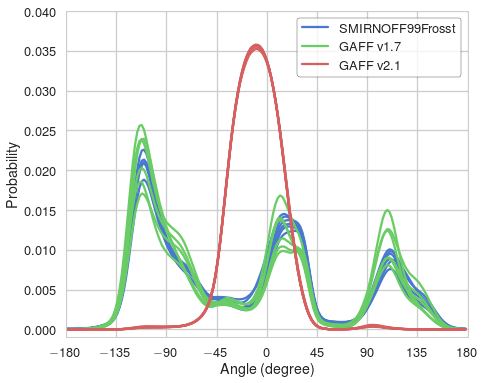

In [115]:
fig, ax = plt.subplots(1, figsize=(6 * 1.2, 6))

palette = sns.color_palette("muted")
for df, clr, name in zip([smirnoff, bgbg_tip3p, bg2bg2_tip3p], [palette[0], palette[1], palette[2]], ["SMIRNOFF99Frosst", 
                                                                                         "GAFF v1.7",
                                                                                         "GAFF v2.1"]):
    
    ax.plot(df["Angle"], df["1"], c=clr, label=name)
    ax.plot(df["Angle"], df["2"], c=clr, label="")
    ax.plot(df["Angle"], df["3"], c=clr, label="")
    ax.plot(df["Angle"], df["4"], c=clr, label="")
    ax.plot(df["Angle"], df["5"], c=clr, label="")
    ax.plot(df["Angle"], df["6"], c=clr, label="")
    
ax.legend(frameon=True, edgecolor="k")
ax.set_xticks(np.arange(-180, 180 + 45, 45))
ax.set_xlim(-180, 180)
ax.set_ylim(-0.001, 0.04)
ax.set_xlabel("Angle (degree)")
ax.set_ylabel(r"Probability")

# Betas

In [103]:
betas = [i for i in systems if i[0] == "b"]
frame = pd.DataFrame()
list_ = []
for index, system in enumerate(betas):
        df = pd.read_csv(f"../smirnoff-host-guest-simulations-data/systems/{system}/smirnoff/r014/flip.hist.dat", sep="\s+", header=0)
        list_.append(df)
frame = pd.concat(list_)
frame.columns = ["Angle", "1", "2", "3", "4", "5", "6", "7"]
smirnoff = frame.groupby(level=0).mean()

In [104]:
betas = [i for i in systems if i[0] == "b"]
frame = pd.DataFrame()
list_ = []
for index, system in enumerate(betas):
        df = pd.read_csv(f"../smirnoff-host-guest-simulations-data/systems/{system}/bg2bg2-tip3p/flip.hist.dat", sep="\s+", header=0)
        list_.append(df)
frame = pd.concat(list_)
frame.columns = ["Angle", "1", "2", "3", "4", "5", "6", "7"]
bg2bg2_tip3p = frame.groupby(level=0).mean()

In [105]:
betas = [i for i in systems if i[0] == "b"]
frame = pd.DataFrame()
list_ = []
for index, system in enumerate(betas):
        df = pd.read_csv(f"../smirnoff-host-guest-simulations-data/systems/{system}/bgbg-tip3p/flip.hist.dat", sep="\s+", header=0)
        list_.append(df)
frame = pd.concat(list_)
frame.columns = ["Angle", "1", "2", "3", "4", "5", "6", "7"]
bgbg_tip3p = frame.groupby(level=0).mean()

Text(0,0.5,'Probability')

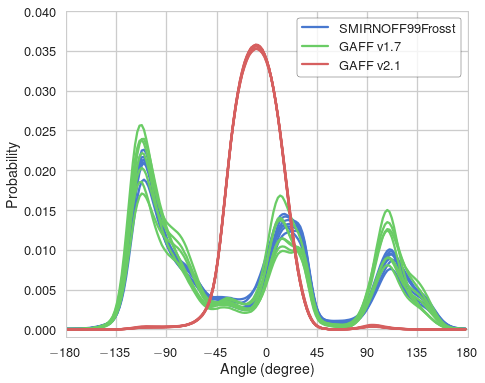

In [116]:
fig, ax = plt.subplots(1, figsize=(6 * 1.2, 6))

palette = sns.color_palette("muted")
for df, clr, name in zip([smirnoff, bgbg_tip3p, bg2bg2_tip3p], [palette[0], palette[1], palette[2]], ["SMIRNOFF99Frosst", 
                                                                                         "GAFF v1.7",
                                                                                         "GAFF v2.1"]):
    
    ax.plot(df["Angle"], df["1"], c=clr, label=name)
    ax.plot(df["Angle"], df["2"], c=clr, label="")
    ax.plot(df["Angle"], df["3"], c=clr, label="")
    ax.plot(df["Angle"], df["4"], c=clr, label="")
    ax.plot(df["Angle"], df["5"], c=clr, label="")
    ax.plot(df["Angle"], df["6"], c=clr, label="")
    ax.plot(df["Angle"], df["7"], c=clr, label="")

    
ax.legend(frameon=True, edgecolor="k")
ax.set_xticks(np.arange(-180, 180 + 45, 45))
ax.set_xlim(-180, 180)
ax.set_ylim(-0.001, 0.04)
ax.set_xlabel("Angle (degree)")
ax.set_ylabel(r"Probability")

## Use `pytraj` to pull out relevant structures

In [36]:
import pytraj as pt
traj = pt.iterload("/home/dslochower/gpfs/smirnoff-host-guest-simulations-data/systems/b-chp-p/smirnoff/r014/prod.*.nc",
                   "/home/dslochower/gpfs/smirnoff-host-guest-simulations-data/systems/b-chp-p/smirnoff/r014/vac.prmtop",
        )

In [37]:
dihedral_1 = pt.dihedral(traj, ":1@O2 :1@C1 :2@C4 :2@O3")
dihedral_2 = pt.dihedral(traj, ":2@O2 :2@C1 :3@C4 :3@O3")
dihedral_3 = pt.dihedral(traj, ":3@O2 :3@C1 :4@C4 :4@O3")
dihedral_4 = pt.dihedral(traj, ":4@O2 :4@C1 :5@C4 :5@O3")
dihedral_5 = pt.dihedral(traj, ":5@O2 :5@C1 :6@C4 :6@O3")
dihedral_6 = pt.dihedral(traj, ":6@O2 :6@C1 :7@C4 :7@O3")
dihedral_7 = pt.dihedral(traj, ":7@O2 :7@C1 :1@C4 :1@O3")

In [38]:
dihedral_list = np.vstack(([dihedral_1, dihedral_2, dihedral_3,
                dihedral_4, dihedral_5, dihedral_6,
                dihedral_7]))

In [39]:
dihedrals = pd.DataFrame(dihedral_list.T)
dihedrals["mean"] = dihedrals.mean(axis = 1)

In [40]:
dihedrals.head()

,0,1,2,3,4,5,6,mean
0,-16.758724,-126.371425,110.214867,-71.115598,41.072816,-11.151101,-19.686558,-13.399389
1,-19.008991,-114.059124,102.645815,-84.157189,48.049062,-17.555846,-16.352921,-14.348456
2,-20.620286,-120.135577,109.214803,-81.920409,36.958750,-24.694312,-15.870634,-16.723952
3,-19.399974,-128.358350,111.674720,-71.503979,34.296225,-26.301928,-17.430417,-16.717672
4,-8.092344,-112.052551,103.976251,-69.702816,41.259282,-28.060791,-17.385936,-12.865558


In [41]:
target = -10
dihedrals.iloc[(dihedrals["mean"][0:2000] - target).abs().argsort()[:2]]

,0,1,2,3,4,5,6,mean
433,26.732587,-104.113153,103.833278,-79.847664,29.144995,32.663147,-78.342161,-9.989853
1397,0.444622,-84.520015,101.994725,-94.466982,28.886744,37.470382,-59.721303,-9.987404


In [42]:
correlation = dihedrals.drop("mean", axis=1).corr()

In [43]:
correlation

,0,1,2,3,4,5,6
0,1.000000,-0.230765,-0.396256,0.431767,0.128456,0.054670,-0.652831
1,-0.230765,1.000000,-0.656038,0.164924,-0.139261,0.252577,-0.172000
2,-0.396256,-0.656038,1.000000,-0.689022,0.074001,-0.018498,0.347522
3,0.431767,0.164924,-0.689022,1.000000,-0.386372,-0.093893,-0.214789
4,0.128456,-0.139261,0.074001,-0.386372,1.000000,-0.551452,0.118156
5,0.054670,0.252577,-0.018498,-0.093893,-0.551452,1.000000,-0.659120
6,-0.652831,-0.172000,0.347522,-0.214789,0.118156,-0.659120,1.000000


Text(0.5,28.9136,'Pseudodihedral number')

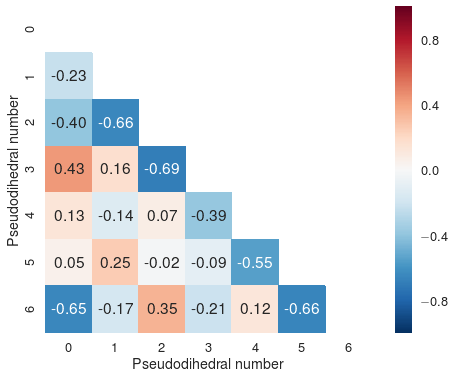

In [44]:
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(1, figsize=(6 * 1.2 * 1/0.85, 6))
    
with sns.axes_style("white"):
    sns.heatmap(correlation, annot=True, mask=mask, vmin=-1, vmax=1, square=True, cmap="RdBu_r",
               fmt="0.02f")
ax.set_ylabel("Pseudodihedral number")
ax.set_xlabel("Pseudodihedral number")

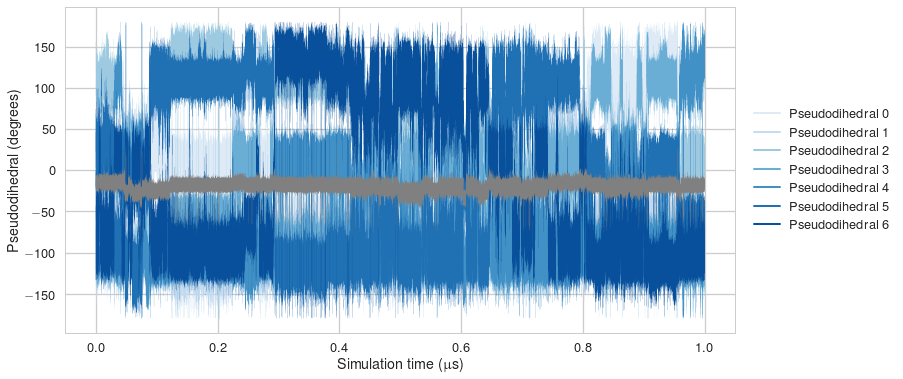

In [45]:
fig, ax = plt.subplots(1, figsize=(6 * 2, 6))

colors = sns.color_palette("Blues", 7)
color_index = 0

for index, column in enumerate(dihedrals.drop("mean", axis=1)):
    length = len(dihedrals)
    time = 2e-9 * 250 * length
    ax.plot(
        np.linspace(0, time, length),
        dihedrals[column],
        lw=0.1,
        color=colors[index],
        label=f"Pseudodihedral {index}"
    )
    
ax.plot(np.linspace(0, time, length), dihedrals["mean"], lw=0.1, color="0.5", label="")
ax.set_ylabel("Pseudodihedral (degrees)")
ax.set_xlabel("Simulation time ($\mu$s)")
leg = ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0)
    lh.set_linewidth(2)

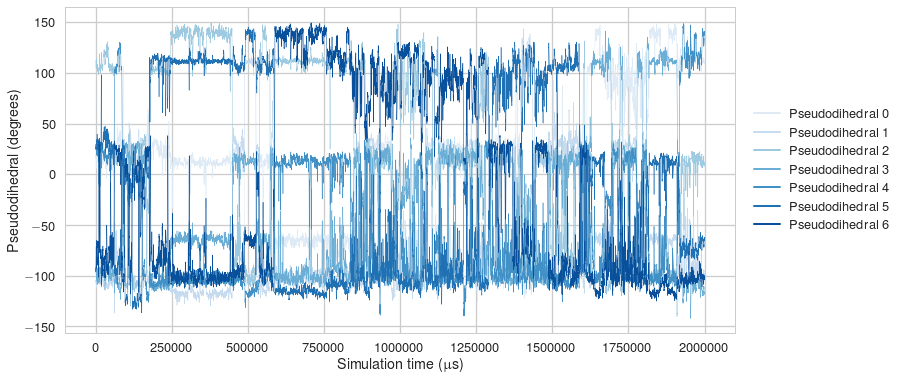

In [55]:
fig, ax = plt.subplots(1, figsize=(6 * 2, 6))

colors = sns.color_palette("Blues", 7)
color_index = 0

for index, column in enumerate(dihedrals.drop("mean", axis=1)):
    
    ax.plot(
        dihedrals[column].rolling(window=1000).mean(),
        lw=0.5,
        color=colors[index],
        label=f"Pseudodihedral {index}"
    )
    
# ax.plot(np.linspace(0, time, length), dihedrals["mean"], lw=0.1, color="0.5", label="")
ax.set_ylabel("Pseudodihedral (degrees)")
ax.set_xlabel("Simulation time ($\mu$s)")
leg = ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0)
    lh.set_linewidth(2)

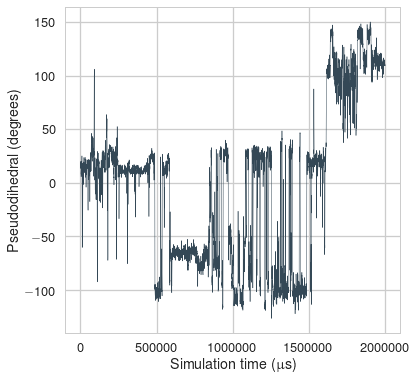

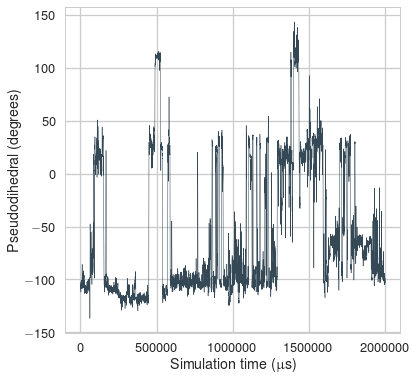

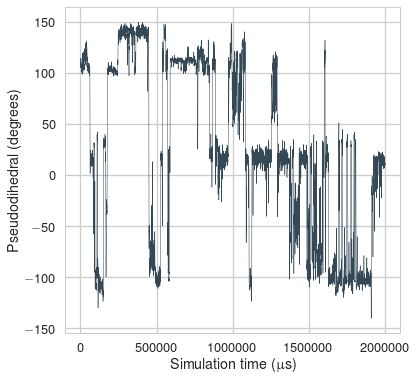

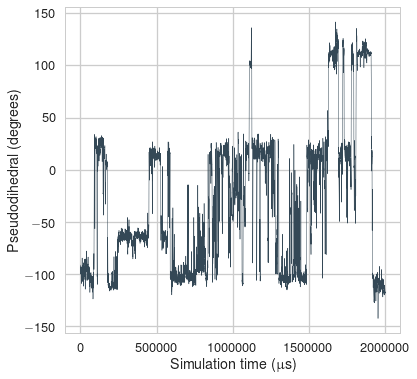

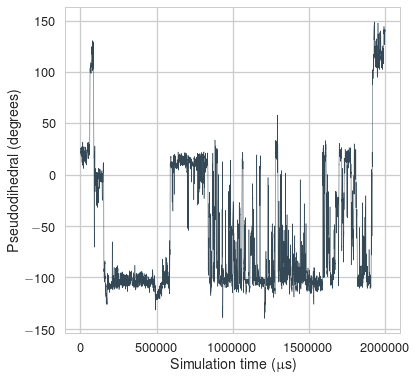

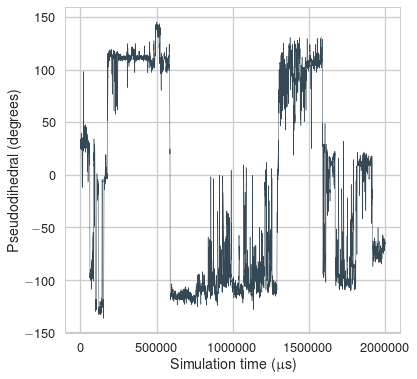

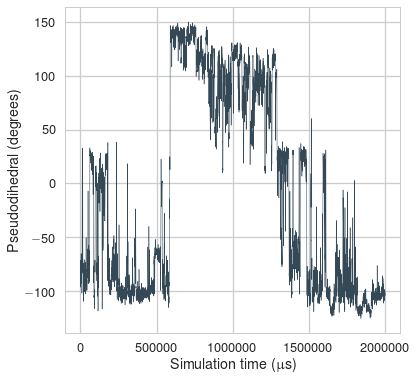

In [58]:
for index, column in enumerate(dihedrals.drop("mean", axis=1)):
    
    fig, ax = plt.subplots(1, figsize=(6, 6))

    colors = sns.color_palette("Blues_d", 7)
    
    ax.plot(
        dihedrals[column].rolling(window=1000).mean(),
        lw=0.5,
        color=colors[0],
    )
    

    ax.set_ylabel("Pseudodihedral (degrees)")
    ax.set_xlabel("Simulation time ($\mu$s)")

## BGBG-TIP3P

In [111]:
import pytraj as pt
traj = pt.iterload("/home/dslochower/kirkwood-niel/projects/cds/wat6/bgbg-tip3p/b-chp-p/r00/traj.*",
                   "/home/dslochower/kirkwood-niel/projects/cds/wat6/bgbg-tip3p/b-chp-p/r00/vac.topo",
        )

In [112]:
dihedral_1 = pt.dihedral(traj, ":4@O2 :4@C1 :5@C4 :5@O3")
dihedral_2 = pt.dihedral(traj, ":5@O2 :5@C1 :6@C4 :6@O3")
dihedral_3 = pt.dihedral(traj, ":6@O2 :6@C1 :7@C4 :7@O3")
dihedral_4 = pt.dihedral(traj, ":7@O2 :7@C1 :8@C4 :8@O3")
dihedral_5 = pt.dihedral(traj, ":8@O2 :8@C1 :9@C4 :9@O3")
dihedral_6 = pt.dihedral(traj, ":9@O2 :9@C1 :10@C4 :10@O3")
dihedral_7 = pt.dihedral(traj, ":10@O2 :10@C1 :4@C4 :4@O3")

In [113]:
dihedral_list = np.vstack(([dihedral_1, dihedral_2, dihedral_3,
                dihedral_4, dihedral_5, dihedral_6,
                dihedral_7]))

dihedrals = pd.DataFrame(dihedral_list.T)
dihedrals["mean"] = dihedrals.mean(axis = 1)

In [114]:
correlation = dihedrals.drop("mean", axis=1).corr()

Text(0.5,28.9136,'Pseudodihedral number')

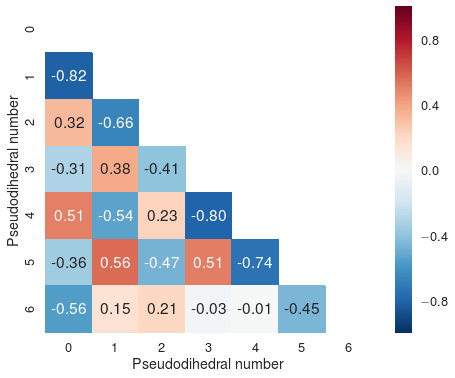

In [115]:
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(1, figsize=(6 * 1.2 * 1/0.85, 6))
    
with sns.axes_style("white"):
    sns.heatmap(correlation, annot=True, mask=mask, vmin=-1, vmax=1, square=True, cmap="RdBu_r",
               fmt="0.02f")
ax.set_ylabel("Pseudodihedral number")
ax.set_xlabel("Pseudodihedral number")

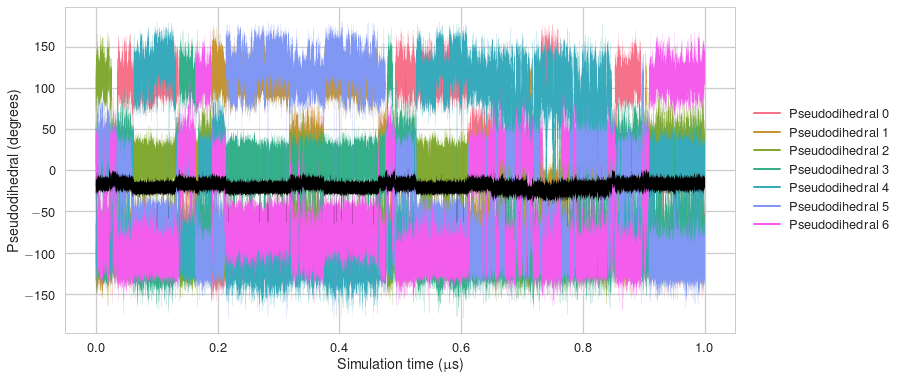

In [117]:
fig, ax = plt.subplots(1, figsize=(6 * 2, 6))

colors = sns.color_palette("husl", 7)
color_index = 0

for index, column in enumerate(dihedrals.drop("mean", axis=1)):
    length = len(dihedrals)
    time = 4e-9 * 500 * length
    ax.plot(
        np.linspace(0, time, length),
        dihedrals[column],
        lw=0.1,
        color=colors[index],
        label=f"Pseudodihedral {index}"
    )
    
ax.plot(np.linspace(0, time, length), dihedrals["mean"], lw=0.1, color="k", label="")
ax.set_ylabel("Pseudodihedral (degrees)")
ax.set_xlabel("Simulation time ($\mu$s)")
leg = ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0)
    lh.set_linewidth(2)

## BG2BG2-TIP3P

In [28]:
import pytraj as pt
traj = pt.iterload("/home/dslochower/gpfs-niel/bg2bg2-tip3p/b-chp-p/r00/traj.*",
                   "/home/dslochower/gpfs-niel/bg2bg2-tip3p/b-chp-p/r00/vac.topo",
        )

In [29]:
dihedral_1 = pt.dihedral(traj, ":4@O2 :4@C1 :5@C4 :5@O3")
dihedral_2 = pt.dihedral(traj, ":5@O2 :5@C1 :6@C4 :6@O3")
dihedral_3 = pt.dihedral(traj, ":6@O2 :6@C1 :7@C4 :7@O3")
dihedral_4 = pt.dihedral(traj, ":7@O2 :7@C1 :8@C4 :8@O3")
dihedral_5 = pt.dihedral(traj, ":8@O2 :8@C1 :9@C4 :9@O3")
dihedral_6 = pt.dihedral(traj, ":9@O2 :9@C1 :10@C4 :10@O3")
dihedral_7 = pt.dihedral(traj, ":10@O2 :10@C1 :4@C4 :4@O3")

dihedral_list = np.vstack(([dihedral_1, dihedral_2, dihedral_3,
                dihedral_4, dihedral_5, dihedral_6,
                dihedral_7]))

dihedrals = pd.DataFrame(dihedral_list.T)
dihedrals["mean"] = dihedrals.mean(axis = 1)

correlation = dihedrals.drop("mean", axis=1).corr()

Text(0.5,28.9136,'Pseudodihedral number')

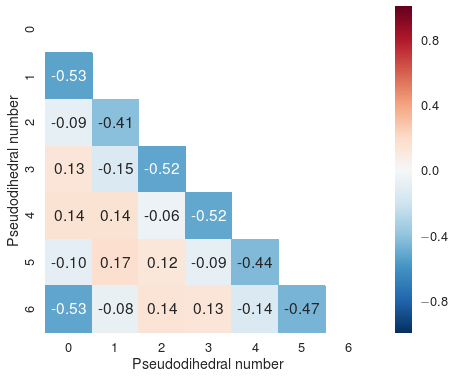

In [30]:
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(1, figsize=(6 * 1.2 * 1/0.85, 6))
    
with sns.axes_style("white"):
    sns.heatmap(correlation, annot=True, mask=mask, vmin=-1, vmax=1, square=True, cmap="RdBu_r",
               fmt="0.02f")
ax.set_ylabel("Pseudodihedral number")
ax.set_xlabel("Pseudodihedral number")

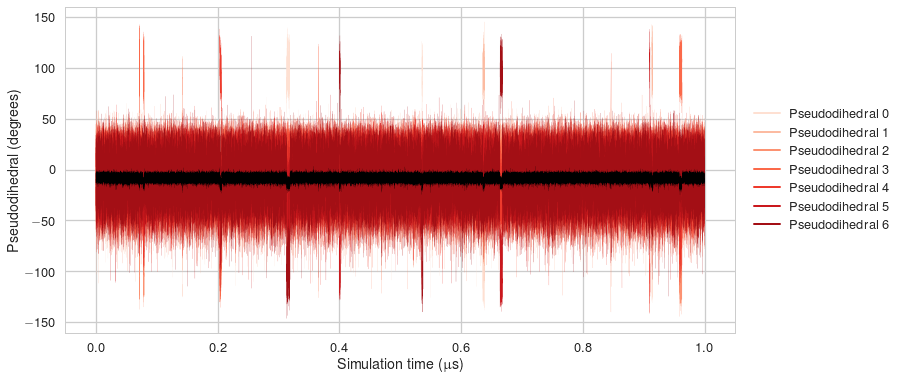

In [31]:
fig, ax = plt.subplots(1, figsize=(6 * 2, 6))

colors = sns.color_palette("Reds", 7)
color_index = 0

for index, column in enumerate(dihedrals.drop("mean", axis=1)):
    length = len(dihedrals)
    time = 4e-9 * 500 * length
    ax.plot(
        np.linspace(0, time, length),
        dihedrals[column],
        lw=0.1,
        color=colors[index],
        label=f"Pseudodihedral {index}"
    )
    
ax.plot(np.linspace(0, time, length), dihedrals["mean"], lw=0.1, color="k", label="")
ax.set_ylabel("Pseudodihedral (degrees)")
ax.set_xlabel("Simulation time ($\mu$s)")
leg = ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0)
    lh.set_linewidth(2)

In [33]:
len(dihedrals)

500000

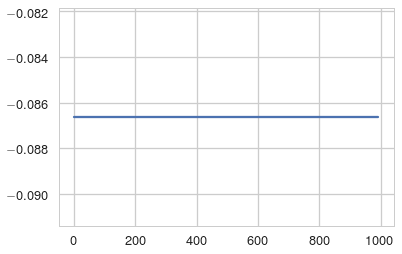

In [35]:
plt.plot(moving_average(dihedrals.iloc[0], 1000))